In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [2]:
baby_meta_df= pd.read_csv('baby_meta.csv', dtype={'salesRank': dict}) 

In [3]:
baby_meta_df.shape

(71317, 10)

In [4]:
baby_rating_df= pd.read_csv('ratings_Baby.csv', names = ['reviewerID', 'asin', 'overall', 'unixReviewTime']) 

In [5]:
baby_rating_df['time_by_day'] = baby_rating_df['unixReviewTime']/86400

In [6]:
baby_rating_df.shape

(915446, 5)

In [7]:
baby_rating_df = baby_rating_df.loc[baby_rating_df['time_by_day']>=14610]

In [8]:
baby_rating_df.shape

(797192, 5)

## Product Ratings

In [9]:
def create_product_rating_count_df(rating_x_meta_df):
    return pd.DataFrame(rating_x_meta_df.groupby('asin').overall.count())\
            .rename(index=str, columns={"overall": "rating_count"})
    

In [10]:
def create_product_avg_rating_df(rating_x_meta_df):
    return pd.DataFrame(rating_x_meta_df.groupby('asin').overall.mean())\
            .rename(index=str, columns={"overall": "avg_rating"})

In [11]:
def create_product_rating_summary_df(rating_df, meta_df):
    rating_x_meta_df = rating_df.join(meta_df.set_index('asin'), on='asin')
    rating_x_meta_df_2010 = \
    rating_x_meta_df.loc[(rating_x_meta_df['time_by_day']>=14610) &\
                            (rating_x_meta_df['time_by_day']< 14975)]
    rating_x_meta_df_2011 = \
    rating_x_meta_df.loc[(rating_x_meta_df['time_by_day']>=14975) &\
                            (rating_x_meta_df['time_by_day']< 15340)]
    rating_x_meta_df_2012 = \
    rating_x_meta_df.loc[(rating_x_meta_df['time_by_day']>=15340) &\
                            (rating_x_meta_df['time_by_day']< 15706)]
    rating_x_meta_df_2013 = \
    rating_x_meta_df.loc[(rating_x_meta_df['time_by_day']>=15706) &\
                            (rating_x_meta_df['time_by_day']< 16071)]
    rating_x_meta_df_2014 = \
    rating_x_meta_df.loc[rating_x_meta_df['time_by_day']>=16071]
    count_df = create_product_rating_count_df(rating_x_meta_df)
    avg_df = create_product_avg_rating_df(rating_x_meta_df)
    count_df = create_product_rating_count_df(rating_x_meta_df)
    avg_df = create_product_avg_rating_df(rating_x_meta_df)
    count_df_2010 = create_product_rating_count_df(rating_x_meta_df_2010).\
                rename(index=str, columns={"rating_count": "rating_count_2010"})
    avg_df_2010 = create_product_avg_rating_df(rating_x_meta_df_2010).\
                rename(index=str, columns={"avg_rating": "avg_rating_2010"})
    count_df_2011 = create_product_rating_count_df(rating_x_meta_df_2011).\
                rename(index=str, columns={"rating_count": "rating_count_2011"})
    avg_df_2011 = create_product_avg_rating_df(rating_x_meta_df_2011).\
                rename(index=str, columns={"avg_rating": "avg_rating_2011"})
    count_df_2012 = create_product_rating_count_df(rating_x_meta_df_2012).\
                rename(index=str, columns={"rating_count": "rating_count_2012"})
    avg_df_2012 = create_product_avg_rating_df(rating_x_meta_df_2012).\
                rename(index=str, columns={"avg_rating": "avg_rating_2012"})
    count_df_2013 = create_product_rating_count_df(rating_x_meta_df_2013).\
                rename(index=str, columns={"rating_count": "rating_count_2013"})
    avg_df_2013 = create_product_avg_rating_df(rating_x_meta_df_2013).\
                rename(index=str, columns={"avg_rating": "avg_rating_2013"})
    count_df_2014 = create_product_rating_count_df(rating_x_meta_df_2014).\
                rename(index=str, columns={"rating_count": "rating_count_2014"})
    avg_df_2014 = create_product_avg_rating_df(rating_x_meta_df_2014).\
                rename(index=str, columns={"avg_rating": "avg_rating_2014"})
    
    return count_df.join(avg_df)\
            .join(count_df_2010).join(avg_df_2010)\
            .join(count_df_2011).join(avg_df_2011)\
            .join(count_df_2012).join(avg_df_2012)\
            .join(count_df_2013).join(avg_df_2013)\
            .join(count_df_2014).join(avg_df_2014).reset_index()
                            

In [12]:
baby_product_rating_summary_df=create_product_rating_summary_df(baby_rating_df, baby_meta_df)

In [13]:
baby_product_rating_summary_df.shape

(59397, 13)

In [14]:
baby_product_rating_summary_df.to_csv('baby_product_rating_summary.csv')

In [15]:
baby_product_rating_summary_df[['asin','rating_count']].to_csv('baby_rating_count.csv')

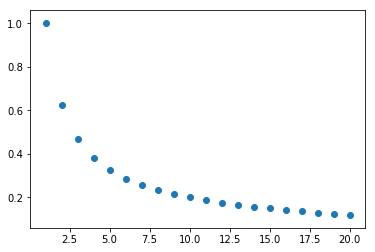

In [16]:
total = baby_product_rating_summary_df.shape[0]
prop_left_ls = []
for n in range(1,21):
    prop_left= baby_product_rating_summary_df.loc[baby_product_rating_summary_df['rating_count']>=n].shape[0]/total
    prop_left_ls.append(prop_left)

    
import matplotlib.pyplot as plt
%matplotlib inline

xs = range(1,21)
ys = prop_left_ls
plt.scatter(xs,ys)
plt.show()

In [17]:
baby_meta_df

,Unnamed: 0,asin,categories,description,title,price,imUrl,brand,related,salesRank
0,0,0188399313,[['Baby']],Wee-Go Glass baby bottles by LifeFactory (Baby...,Lifefactory 4oz BPA Free Glass Baby Bottles - ...,69.99,http://ecx.images-amazon.com/images/I/41Swthpd...,Lifefactory,"{'also_bought': ['B002SG7K7A', 'B003CJSXW8', '...",NaN
1,1,0188399518,[['Baby']],The Planet Wise Flannel Wipes are 10 super sof...,Planetwise Flannel Wipes,15.95,http://ecx.images-amazon.com/images/I/41otjnA4...,Planet Wise,"{'also_bought': ['B00G96N3YY', 'B003XSEV2O', '...",NaN
2,2,0188399399,[['Baby']],The Planet Wise Wipe PouchTM features our pate...,Planetwise Wipe Pouch,10.95,http://ecx.images-amazon.com/images/I/61x8h9u6...,NaN,"{'also_bought': ['B005WWI0DA', 'B005WWIMGA', '...",NaN
3,3,0316967297,[['Baby']],Hand crafted set includes 1 full quilt (76x86 ...,Annas Dream Full Quilt with 2 Shams,109.95,http://ecx.images-amazon.com/images/I/51%2BZ1%...,NaN,"{'also_viewed': ['B009LTER3W', 'B00575TI5Q', '...",NaN
4,4,0615447279,[['Baby']],Thumbuddy To Love- The Binky Fairy helps child...,Stop Pacifier Sucking without tears with Thumb...,16.95,http://ecx.images-amazon.com/images/I/51RKKENl...,NaN,"{'also_bought': ['0979670004', '1601310234', '...",NaN
5,5,0670062049,[['Baby']],A baby can be put at risk with an unsafe pacif...,5 Pink Gumdrops + One Pacifier Clip,9.99,http://ecx.images-amazon.com/images/I/41u7qILN...,NaN,"{'also_viewed': ['B005QPE0W8', 'B00AZWDLHM', '...",NaN
6,6,0705391752,[['Baby']],Overview\n\nInclude the beloved Peter Rabbit i...,A Tale of Baby's Days with Peter Rabbit,65.07,http://ecx.images-amazon.com/images/I/51%2BNFd...,NaN,"{'also_viewed': ['B001AL7GOQ', '0723256837', '...",NaN
7,7,097293751X,[['Baby']],Easily keep track of your baby's or child's da...,"Baby Tracker&reg; - Daily Childcare Journal, S...",17.00,http://ecx.images-amazon.com/images/I/41Bb6wf%...,Time Too,"{'also_bought': ['9729375011', 'B004FN1AE8', '...",NaN
8,8,0974671517,[['Baby']],What should we call the Twins? uses an amusing...,Wee Gallery Twins Board Book,3.58,http://ecx.images-amazon.com/images/I/51lCiAJW...,Wee Gallery,"{'also_bought': ['0670013102', '0763637025', '...",NaN
9,9,0980027519,[['Baby']],"These adorable, high quality calendars are gen...",Nature's Lullabies First and Second Year Calen...,NaN,http://ecx.images-amazon.com/images/I/41NAMKmS...,NaN,NaN,NaN
